# import

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
#standard txt reader with read permission
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv("Project_data_outdone.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2645 non-null   int64  
 1   MS SubClass      2645 non-null   int64  
 2   MS Zoning        2645 non-null   object 
 3   Lot Frontage     2207 non-null   float64
 4   Lot Area         2645 non-null   int64  
 5   Street           2645 non-null   object 
 6   Alley            184 non-null    object 
 7   Lot Shape        2645 non-null   object 
 8   Land Contour     2645 non-null   object 
 9   Utilities        2645 non-null   object 
 10  Lot Config       2645 non-null   object 
 11  Land Slope       2645 non-null   object 
 12  Neighborhood     2645 non-null   object 
 13  Condition 1      2645 non-null   object 
 14  Condition 2      2645 non-null   object 
 15  Bldg Type        2645 non-null   object 
 16  House Style      2645 non-null   object 
 17  Overall Qual  

<AxesSubplot:>

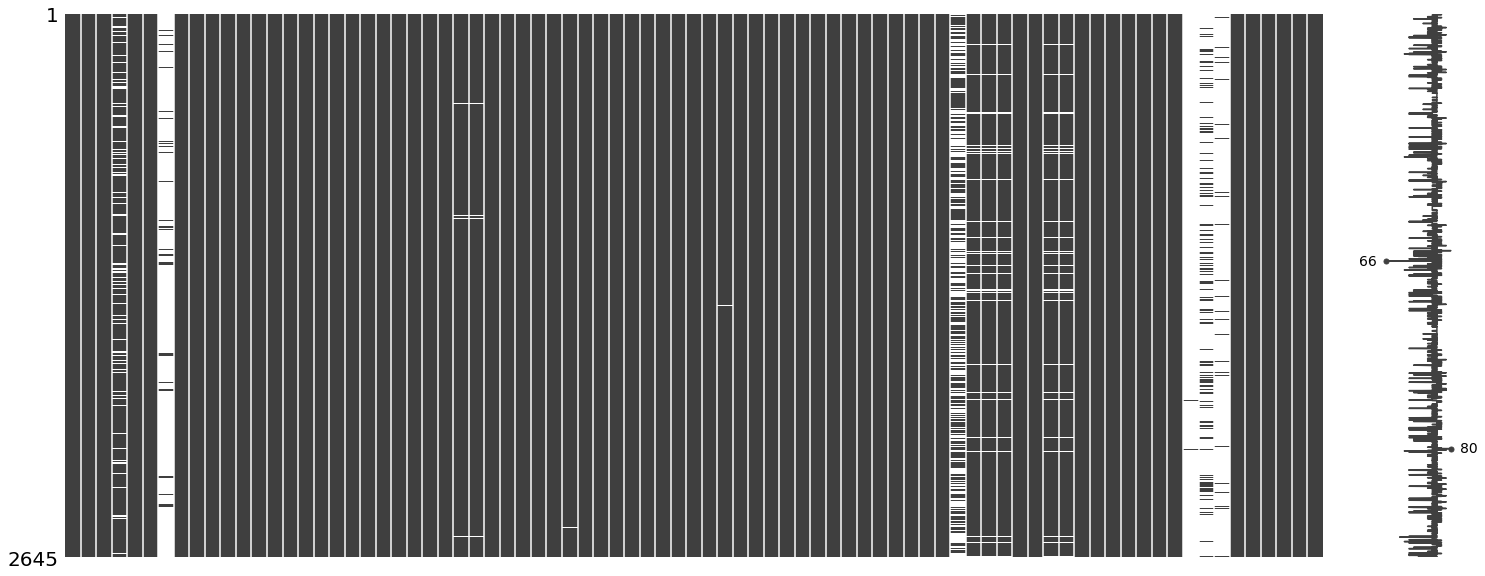

In [5]:
#visualize missing data
msno.matrix(df)

# remove start

In [6]:
#remove the column PID, not usefull features
df = df.drop("PID",axis=1)

In [7]:
#this will return true if there are any missing values
#use this at the end as a checker
df.isnull().values.any()

True

In [8]:
#percentage of missing data...times *100 for percent
#similar to code below
#this for fun
df.isna().mean().round(3)*100

MS SubClass        0.0
MS Zoning          0.0
Lot Frontage      16.6
Lot Area           0.0
Street             0.0
                  ... 
Mo Sold            0.0
Yr Sold            0.0
Sale Type          0.0
Sale Condition     0.0
SalePrice          0.0
Length: 80, dtype: float64

In [9]:
dfmissing = df.isnull()

In [10]:
#sum of missing values
x = dfmissing.sum()
x

MS SubClass         0
MS Zoning           0
Lot Frontage      438
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [11]:
#percentage of missing value
x/len(df)*100 

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.559546
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [12]:
#length of the dataset
len(df)

2645

In [13]:
#function to check percentage of missing values
def missingpercentage(df):
    #copy formula above
    percent = x/len(df)*100
    #percent = percent.sort_values(ascending=True) #sort from no missing to missing
    percent = percent[percent > 0].sort_values() #this one ignores the no missing features
    return percent

In [14]:
percent = missingpercentage(df)

In [15]:
#this returns all the list of features with missing data
percent

Electrical         0.037807
Garage Area        0.037807
Bsmt Half Bath     0.037807
Bsmt Full Bath     0.037807
Total Bsmt SF      0.037807
Bsmt Unf SF        0.037807
BsmtFin Type 2     0.037807
BsmtFin SF 1       0.037807
BsmtFin SF 2       0.037807
Bsmt Cond          0.037807
Bsmt Qual          0.037807
BsmtFin Type 1     0.037807
Garage Cars        0.037807
Bsmt Exposure      0.151229
Mas Vnr Area       0.793951
Mas Vnr Type       0.793951
Garage Type        5.330813
Garage Finish      5.406427
Garage Qual        5.406427
Garage Cond        5.406427
Garage Yr Blt      5.406427
Lot Frontage      16.559546
Fireplace Qu      50.132325
Fence             79.697543
Alley             93.043478
Misc Feature      96.370510
Pool QC           99.735350
dtype: float64

In [16]:
#arrange them 
percent[percent < 1] #arrange all features with missing val that is less than 1%
#0.035727 means 1 missing value
#dont believe ?? test it

Electrical        0.037807
Garage Area       0.037807
Bsmt Half Bath    0.037807
Bsmt Full Bath    0.037807
Total Bsmt SF     0.037807
Bsmt Unf SF       0.037807
BsmtFin Type 2    0.037807
BsmtFin SF 1      0.037807
BsmtFin SF 2      0.037807
Bsmt Cond         0.037807
Bsmt Qual         0.037807
BsmtFin Type 1    0.037807
Garage Cars       0.037807
Bsmt Exposure     0.151229
Mas Vnr Area      0.793951
Mas Vnr Type      0.793951
dtype: float64

In [17]:
# Drop columns based on threshold limit
threshold = len(df) * 0.60
df=df.dropna(axis=1, thresh=threshold)
# View columns in the dataset
df.shape

(2645, 75)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2645 non-null   int64  
 1   MS Zoning        2645 non-null   object 
 2   Lot Frontage     2207 non-null   float64
 3   Lot Area         2645 non-null   int64  
 4   Street           2645 non-null   object 
 5   Lot Shape        2645 non-null   object 
 6   Land Contour     2645 non-null   object 
 7   Utilities        2645 non-null   object 
 8   Lot Config       2645 non-null   object 
 9   Land Slope       2645 non-null   object 
 10  Neighborhood     2645 non-null   object 
 11  Condition 1      2645 non-null   object 
 12  Condition 2      2645 non-null   object 
 13  Bldg Type        2645 non-null   object 
 14  House Style      2645 non-null   object 
 15  Overall Qual     2645 non-null   float64
 16  Overall Cond     2645 non-null   int64  
 17  Year Built    

In [19]:
#just checking how many missing data
df['Electrical'].isnull().sum() #see only 1 missing

1

In [20]:
#total row of data
len(df)

2645

In [21]:
#list of features with missng values
listmiss = df.columns[df.isnull().any()].tolist()
listmiss
#df.columns[df.isnull().any()] does the same thing

['Lot Frontage',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

# split the process into numeric and object type

In [22]:
#first we need to identify which one is object and which one is numeric
#for object its a string so we need to input "None"
#for numeric we need to input '0' instead

# features with numeric data

In [23]:
#shows the list of features with numeric datatype
#need to replace empty values with '0'
#df.select_dtypes(exclude='object')['Misc Feature']
df.select_dtypes(exclude='object')


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6.0,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000.0
1,20,80.0,11622,5.0,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000.0
2,20,81.0,14267,6.0,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000.0
3,20,93.0,11160,7.0,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000.0
4,60,74.0,13830,5.0,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,80,37.0,7937,6.0,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500.0
2641,20,NaN,8885,5.0,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000.0
2642,85,62.0,10441,5.0,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000.0
2643,20,77.0,10010,5.0,5,1974,1975,0.0,1071.0,123.0,...,240,38,0,0,0,0,0,4,2006,170000.0


<AxesSubplot:>

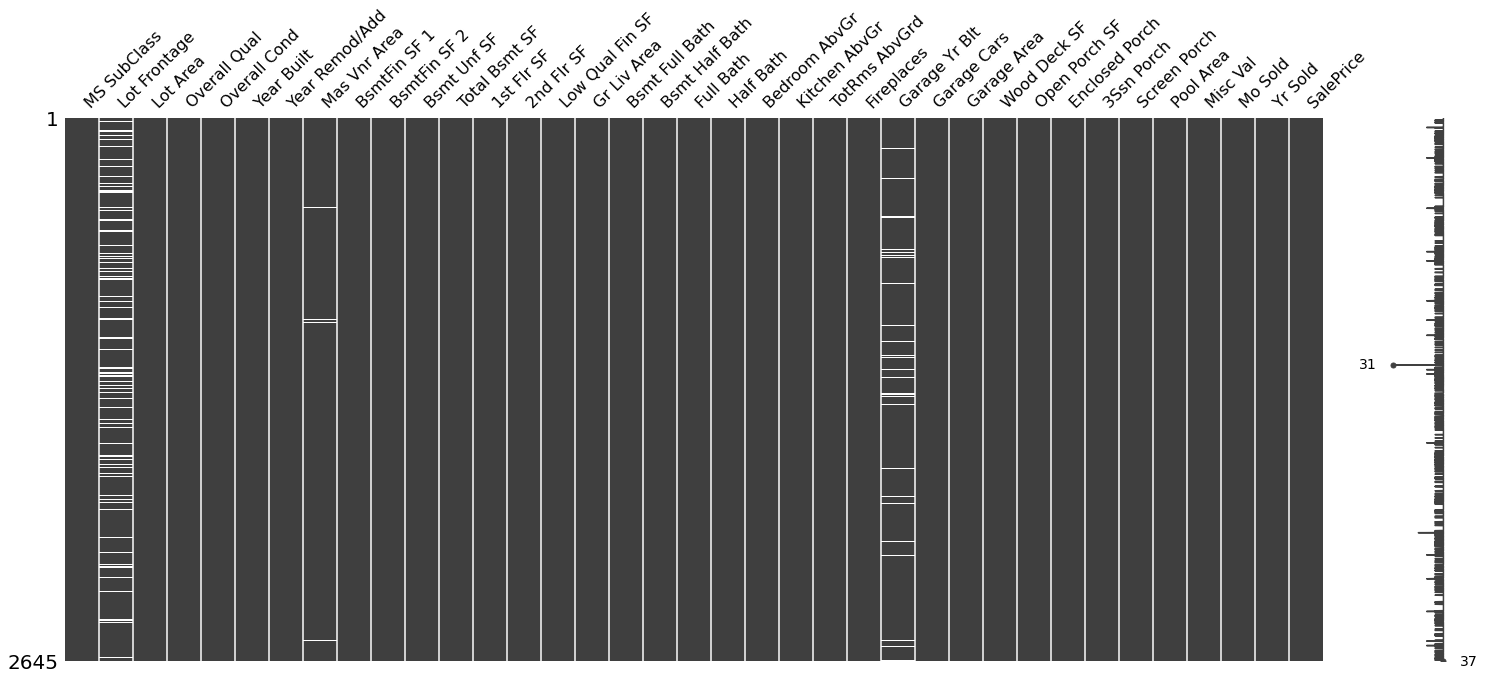

In [24]:
msno.matrix(df.select_dtypes(exclude='object'))

In [25]:
#is there missng values in numeric datatype features?
#check of any missing in numeric features df.isnull().values.any()
b = df.select_dtypes(exclude='object')
b.isnull().values.any()

True

In [26]:
#fill with median()
#check one by one
df[['Lot Frontage','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Garage Area']] = df[['Lot Frontage','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Garage Area']].fillna(df.median())

In [27]:
#fill with 0
#check one by one
df[['Bsmt Full Bath','Bsmt Half Bath','Garage Yr Blt','Garage Cars']] = df[['Bsmt Full Bath','Bsmt Half Bath','Garage Yr Blt','Garage Cars']].fillna(value=0)

In [28]:
#is there missng values in numeric datatype features?
#check of any missing in numeric features df.isnull().values.any()
b = df.select_dtypes(exclude='object')
b.isnull().values.any()

False

<AxesSubplot:>

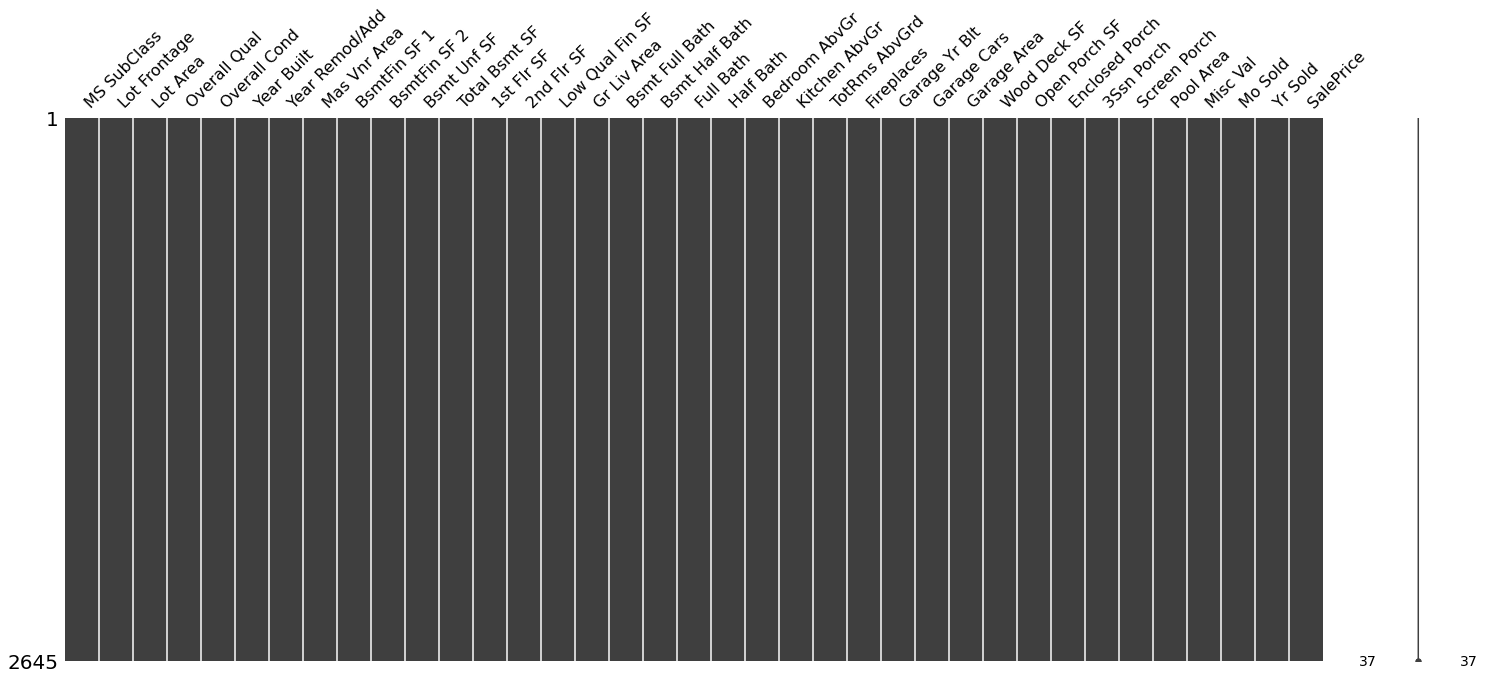

In [29]:
msno.matrix(df.select_dtypes(exclude='object'))

# features with object datatype

In [30]:
#shows the list of features with object datatype
#do not we oso need to refer to the .txt to check what kind of data to replace.."None" is not an all cure solution 
df.select_dtypes(include='object')

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
2641,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2642,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
2643,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


<AxesSubplot:>

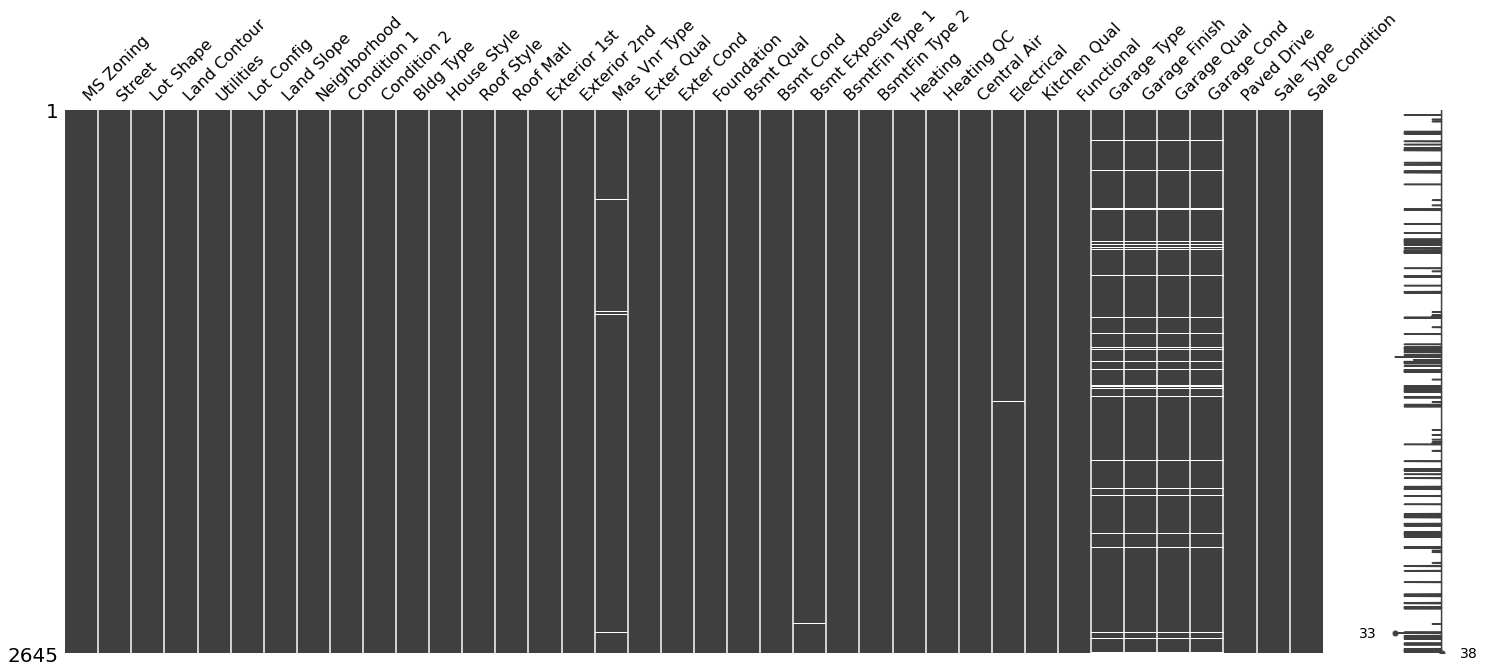

In [31]:
msno.matrix(df.select_dtypes(include='object'))

In [32]:
#is there missng values in object datatype features?
a = df.select_dtypes(include='object')
a.isnull().values.any()

True

In [33]:
#found this code online https://stackoverflow.com/questions/34913590/fillna-in-multiple-columns-in-place-in-python-pandas
#https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.dtype.kind.html
#use apply for both
#this not sure how the impact is because 'none' is not for all object
#df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

#use x.fillna(x.mean()) for mean instead of 0
#df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('None'))

In [34]:
#fill with none
df[['Mas Vnr Type']] = df[['Mas Vnr Type']].fillna(value="None")

In [35]:
#fill with NA 
#NA causes problem when loading to csv. and importing back
#it detect NA as NaN
#we try to use something else as replacement
df[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Garage Type','Garage Finish','Garage Qual','Garage Cond']] = df[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Garage Type','Garage Finish','Garage Qual','Garage Cond']].fillna(value="NAS")

In [36]:
#fill with unique
df[['Electrical']] = df[['Electrical']].fillna(value="Mix")

In [37]:
#check for any mssing values
b = df.select_dtypes(include='object')
b.isnull().values.any()
#True means got missing values

False

<AxesSubplot:>

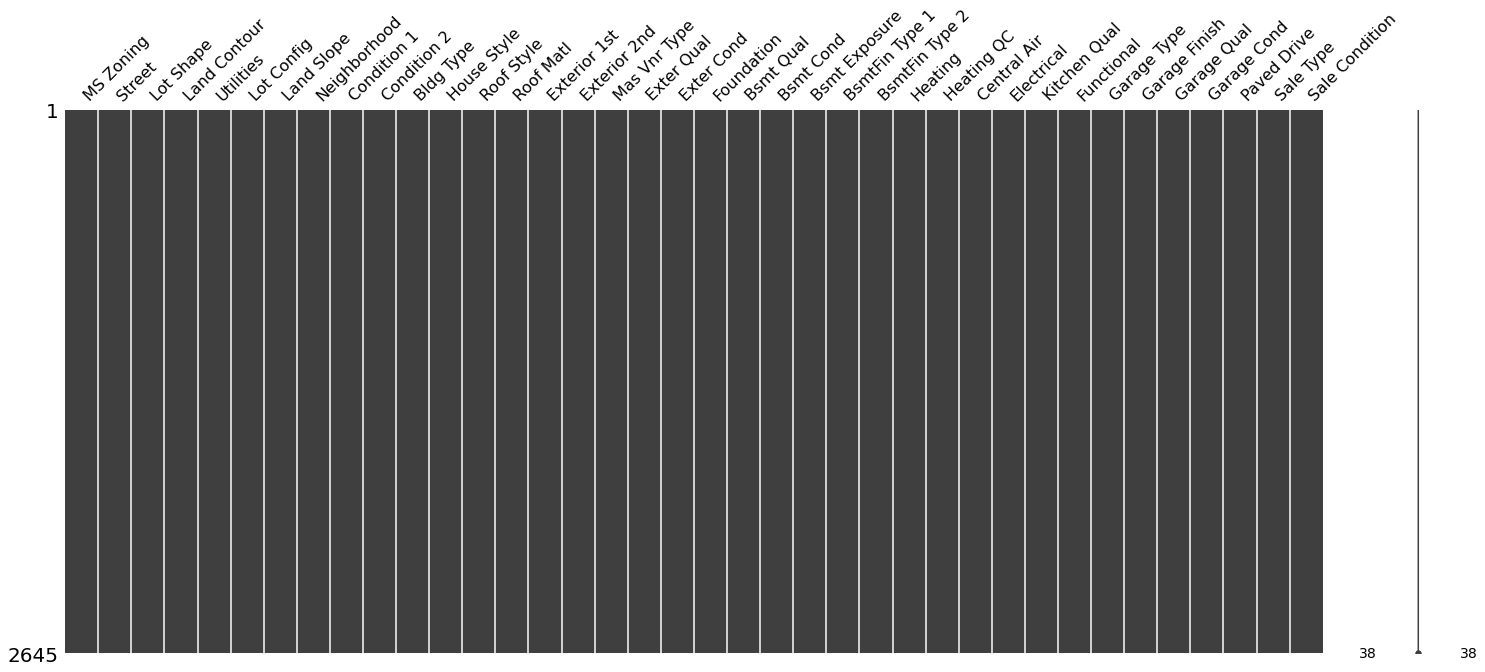

In [38]:
msno.matrix(df.select_dtypes(include='object'))

# Checking for all features

In [39]:
#list of features with missng values
listmiss = df.columns[df.isnull().any()].tolist()
listmiss
#df.columns[df.isnull().any()] #does the same 
#if empty..means no more 

[]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2645 non-null   int64  
 1   MS Zoning        2645 non-null   object 
 2   Lot Frontage     2645 non-null   float64
 3   Lot Area         2645 non-null   int64  
 4   Street           2645 non-null   object 
 5   Lot Shape        2645 non-null   object 
 6   Land Contour     2645 non-null   object 
 7   Utilities        2645 non-null   object 
 8   Lot Config       2645 non-null   object 
 9   Land Slope       2645 non-null   object 
 10  Neighborhood     2645 non-null   object 
 11  Condition 1      2645 non-null   object 
 12  Condition 2      2645 non-null   object 
 13  Bldg Type        2645 non-null   object 
 14  House Style      2645 non-null   object 
 15  Overall Qual     2645 non-null   float64
 16  Overall Cond     2645 non-null   int64  
 17  Year Built    

<AxesSubplot:>

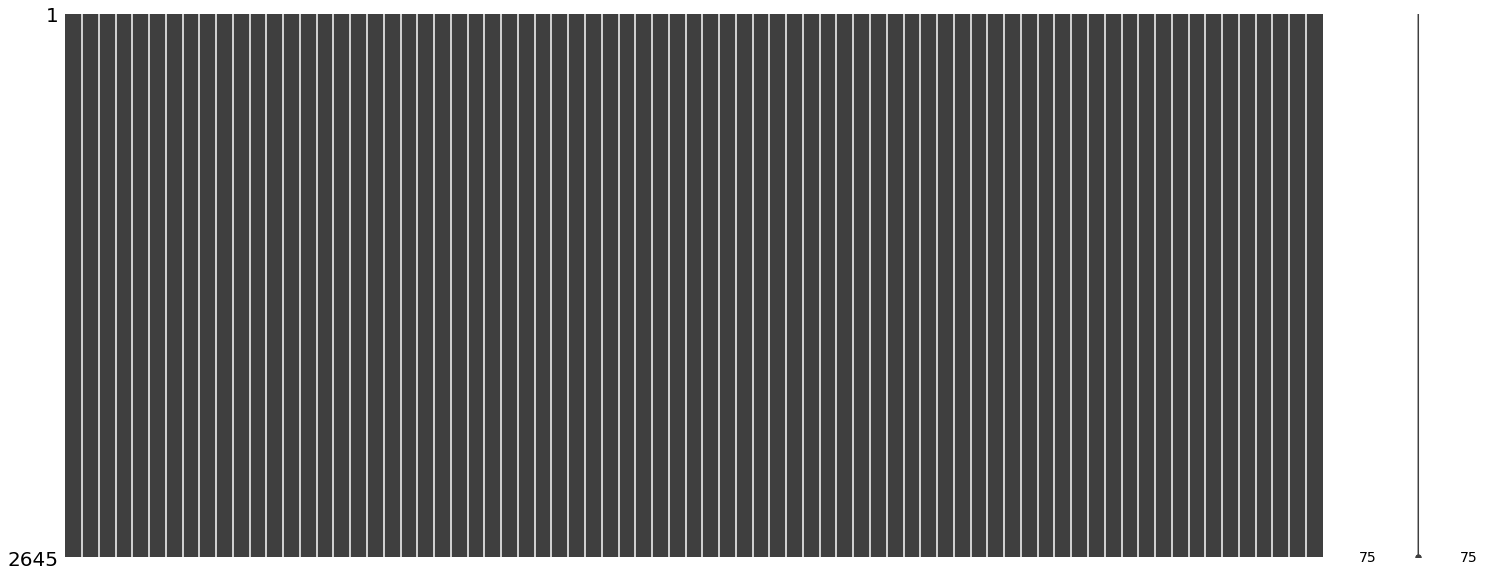

In [41]:
msno.matrix(df)

In [42]:
df.to_csv('project_data_missdone.csv',index=False)

In [43]:
listmiss = df.columns[df.isnull().any()].tolist()
listmiss

[]

In [44]:
df = pd.read_csv("project_data_missdone.csv")

# why does this persist?

In [45]:
#assumption is because the data is NA...when exported to csv its read as not data (NaN)
#thats why when reading it back it detect it as NAN
#only occur when the data in column is replaced to NA before saving csv

In [46]:
listmiss = df.columns[df.isnull().any()].tolist()
listmiss

[]